In [250]:
!pip install selenium

In [251]:
import pandas as pd
from selenium import webdriver
import warnings
warnings.filterwarnings('ignore')
from selenium.webdriver.common.by import By
import time

from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException
import requests

# QUESTION NO 1 AND 2 SEARCH GUITAR AND SCRAPPING ALL RELEVANT DETAILS 

In [4]:
driver=webdriver.Chrome()

In [5]:
driver.get("https://www.amazon.com/")

In [7]:
search=driver.find_element(By.XPATH,'/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[2]/div[1]/input')
search.send_keys('guitars')

In [8]:
guitar_search=driver.find_element(By.XPATH,'/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[3]/div/span/input')
guitar_search.click()

In [21]:
#SCRAPPING THE NAME OF THE PRODUCT FROM THE GIVEN PAGE
product_name=[]
start=0
end=3
for page in range(start,end)[0:144]:
    name_tags=driver.find_elements(By.XPATH,'//span[@class="a-size-base-plus a-color-base a-text-normal"]')
    for i in name_tags:
        name_i=i.text
        product_name.append(name_i)
    next=driver.find_element(By.XPATH,'//a[@class="s-pagination-item s-pagination-next s-pagination-button s-pagination-separator"]')
    next.click()
    time.sleep(3)

In [22]:
product_name=product_name[0:144]
print(product_name)

['Joymusic 38 inch blueburst beginner acoustic guitar kit,bundle with a strap with picks holder,digital tuner, set strings, capo,cleaning cloth,6 picks,gig bag.(JG-38C,BLS)', 'YMC 38" Blue Beginner Acoustic Guitar Starter Package Student Guitar with Gig Bag,Strap, 3 thickness 9 Picks,2 Pickguards,Pick Holder, Extra Strings, Electronic Tuner -Blue', 'Enya Nova Go Carbon Fiber Acoustic Guitar 1/2 Size Beginner Adult Travel Acustica Guitarra w/Starter Bundle Kit of Colorful Packaging, Acoustic Guitar Strap, Gig Bag, Cleaning Cloth, String(Black)', '38" Wood Guitar With Case and Accessories for Kids/Boys/Girls/Teens/Beginners (Sunburst)', 'RockJam Acoustic Guitar Superkit Includes Stand, Gig Bag, Tuner, Picks, Plectrum Holder, Spare Strings & Online Lessons 6 Pack, Right, Natural, Full (RJW-101-N-PK)', '30" Wood Classical Guitar with Case and Accessories for Kids/Girls/Boys/Beginners (Pink)', 'Jackson 6 String Solid-Body Electric Guitar, other, Snow White RFB (2910120500)', 'Pyle Beginner 

In [23]:
len(product_name)

144

In [24]:
price=[]
start=0
end=3
for page in range(start,end):
    try:
        price_tags=driver.find_elements(By.XPATH,'//span[@class="a-price-whole"]')
        for i in price_tags:
            price_i=i.text
            price.append(price_i)
    
    except NoSuchElementException:
            
            price.append('not present')


    
    
    next=driver.find_element(By.XPATH,'//a[@class="s-pagination-item s-pagination-next s-pagination-button s-pagination-separator"]')
    next.click()
    time.sleep(3)    
        
        

In [27]:
price=price[0:144]
print(price)


['36', '14', '69', '17', '170', '189', '159', '179', '229', '199', '199', '199', '229', '199', '229', '24.', '24.', '', '116', '199', '87', '169', '149', '36', '25', '229', '179', '144', '149', '79', '8', '11', '9', '219', '179', '159', '24', '24', '35', '12', '129', '179', '169', '199', '180', '126', '259', '199', '119', '151', '62', '39', '28', '14', '39', '8', '18', '79', '4', '149', '169', '25', '36', '229', '29', '489', '179', '144', '26', '24', '149', '24.', '24.', '', '219', '267', '39', '721', '179', '179', '159', '16', '24', '290', '12', '36', '5', '14', '899', '169', '158', '25', '89', '15', '69', '169', '199', '180', '126', '259', '199', '119', '290', '169', '182', '151', '62', '39', '28', '14', '30', '12', '13', '15', '182', '168', '151', '62', '39', '28', '14', '16', '289', '24.', '24.', '', '110', '184', '213', '11', '114', '251', '81', '19', '33', '299', '349', '15', '5', '149', '129', '14', '12', '85']


In [28]:
len(price)

144

In [39]:
availability=[]
start=0
end=3
for page in range(start,end):
    try:
        availability_tags=driver.find_elements(By.XPATH,'//span[@class="a-size-small a-color-base"]')
        for i in availability_tags:
            availability_i=i.text
            availability.append(availability_i)
    except NoSuchElementException:
        availability.append('not present')
        
        

        
    next=driver.find_element(By.XPATH,'//span[@class="s-pagination-item s-pagination-next s-pagination-disabled "]')
    next.click()
    time.sleep(3)            

                

In [43]:

print(availability)

['Ships to India', 'Ships to India', 'Ships to India', 'Ships to India', 'Ships to India', 'Ships to India', 'Ships to India', 'Ships to India', 'Ships to India', 'Ships to India', 'Ships to India', 'Ships to India', 'Ships to India', 'Ships to India', 'Ships to India', 'Ships to India', 'Ships to India', 'Ships to India', 'Ships to India', '& Up', '& Up', '& Up', '& Up', 'Ships to India', 'Ships to India', 'Ships to India', 'Ships to India', 'Ships to India', 'Ships to India', 'Ships to India', 'Ships to India', 'Ships to India', 'Ships to India', 'Ships to India', 'Ships to India', 'Ships to India', 'Ships to India', 'Ships to India', 'Ships to India', 'Ships to India', 'Ships to India', 'Ships to India', '& Up', '& Up', '& Up', '& Up', 'Ships to India', 'Ships to India', 'Ships to India', 'Ships to India', 'Ships to India', 'Ships to India', 'Ships to India', 'Ships to India', 'Ships to India', 'Ships to India', 'Ships to India', 'Ships to India', 'Ships to India', 'Ships to India',

In [44]:
len(availability)

69

In [45]:
url=[]
start=0
end=3
for page in range(start,end): 
    url_tags=driver.find_elements(By.XPATH,'//a[@class="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal"]')
    for i in url_tags:
        url.append(i.get_attribute('href'))
    next=driver.find_element(By.XPATH,'//span[@class="s-pagination-item s-pagination-next s-pagination-disabled "]')
    next.click()
    time.sleep(3)            
        
               

In [49]:

print(url)

['https://www.amazon.com/sspa/click?ie=UTF8&spc=MTo3NzgxOTY3MTkxNDQwMDM5OjE3MDc0NjUzMTQ6c3BfYXRmX25leHQ6MjAwMTI1MDUxNzA3NDk4OjowOjo&url=%2FHQGC-Cable-Electric-Instrument-Amplifier%2Fdp%2FB0BB93LQMG%2Fref%3Dsr_1_289_sspa%3Fcrid%3D37O0QUA6IXWNE%26keywords%3Dguitars%26qid%3D1707465314%26sprefix%3Dguitars%252Caps%252C865%26sr%3D8-289-spons%26sp_csd%3Dd2lkZ2V0TmFtZT1zcF9hdGZfbmV4dA%26psc%3D1', 'https://www.amazon.com/sspa/click?ie=UTF8&spc=MTo3NzgxOTY3MTkxNDQwMDM5OjE3MDc0NjUzMTQ6c3BfYXRmX25leHQ6MzAwMDgwMzkzNjY1NTAyOjowOjo&url=%2FMr-Power-Decoration-Function-Basement-Rehearsal%2Fdp%2FB0CHJQX1JG%2Fref%3Dsr_1_290_sspa%3Fcrid%3D37O0QUA6IXWNE%26keywords%3Dguitars%26qid%3D1707465314%26sprefix%3Dguitars%252Caps%252C865%26sr%3D8-290-spons%26sp_csd%3Dd2lkZ2V0TmFtZT1zcF9hdGZfbmV4dA%26psc%3D1', 'https://www.amazon.com/sspa/click?ie=UTF8&spc=MTo3NzgxOTY3MTkxNDQwMDM5OjE3MDc0NjUzMTQ6c3BfYXRmX25leHQ6MzAwMTExNzg2ODEyMjAyOjowOjo&url=%2FGuitar-Adapter-Charger-Negative-Effects%2Fdp%2FB0C2ZPLH99%2Fref%3Dsr_1_2

In [51]:
len(url)

93

# QUESTION NO 3

# PYTHON PROGRAM TO SCRAP 10 IMAGES FOR FRUITS,CARS,MACHINE LEARNING,GUITAR,CAKES

In [107]:
driver=webdriver.Chrome()

In [108]:
driver.get('https://images.google.com/')
time.sleep(4)

In [109]:
search=driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/textarea')
search.send_keys('fruits')


In [110]:
search_fruits=driver.find_element(By.XPATH,'/html/body')
search_fruits.click()


['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]
Images of fruits are:
48

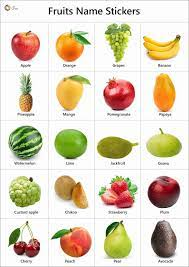
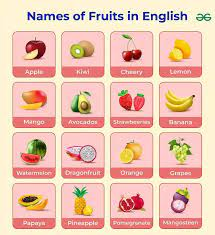
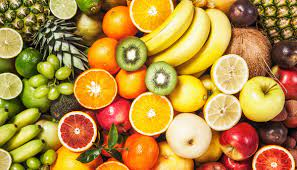
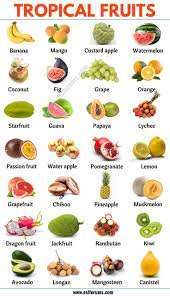
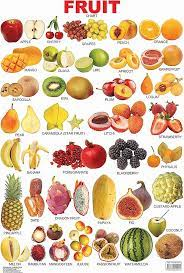
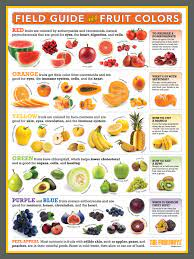
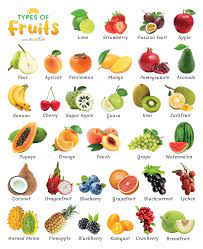
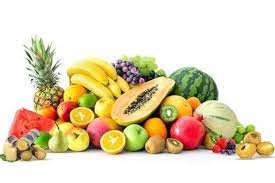
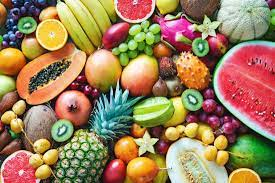
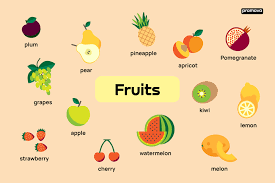
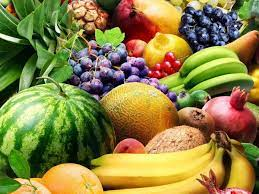
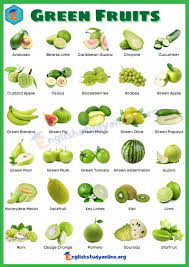
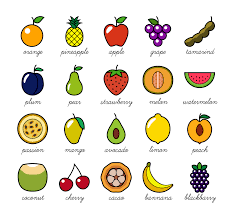
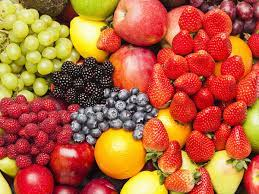
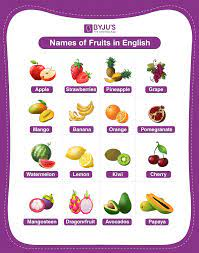
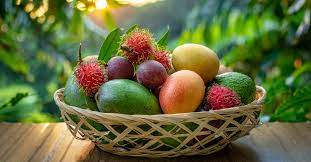
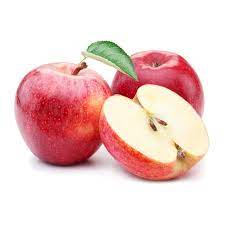
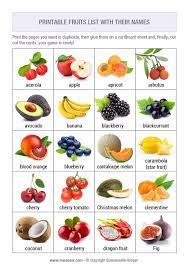
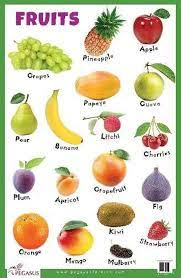
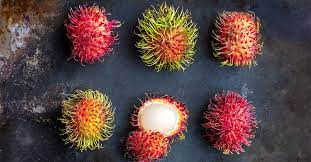

In [111]:
#scrapping 10 images of fruits from the given page
images=[]
image_tags=driver.find_elements(By.XPATH,'//img[@class="rg_i Q4LuWd"]')
for i in image_tags:
    images.append(i.get_attribute('src'))

print(images)
print("Images of fruits are:")
print(len(images))
time.sleep(4)
driver.quit()
       

['', '', '', '', '', '', '', '', '', '']

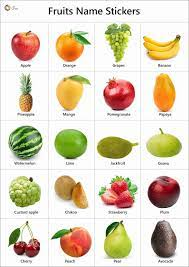
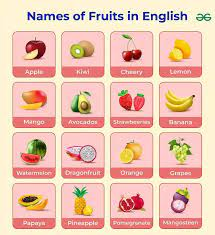
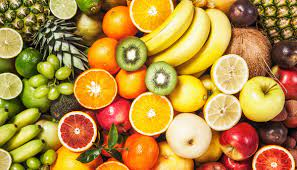
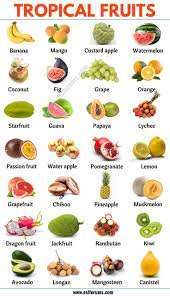
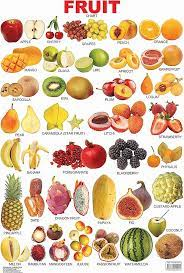
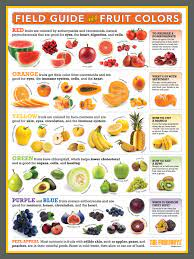
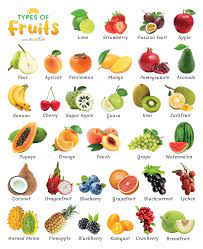
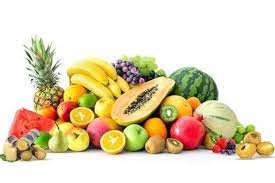
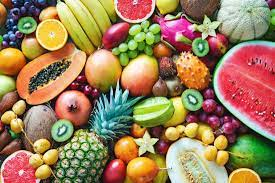
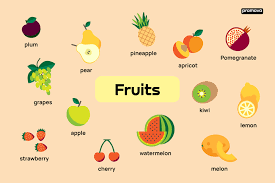

In [112]:
images=images[0:10]
print(images)

In [113]:
len(images)

10

In [117]:
#Scraping machine learning images
driver=webdriver.Chrome()
driver.get('https://images.google.com/')
time.sleep(4)
search=driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/textarea')
search.send_keys("Machine Learning")


In [118]:
search=driver.find_element(By.XPATH,'/html/body')
search.click()

['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]
images of machine learning are:
48

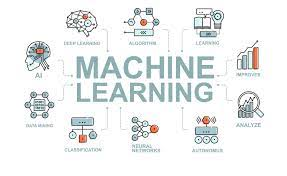
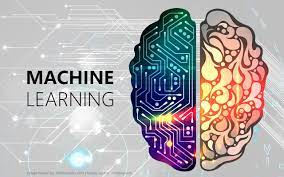
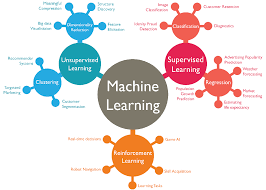
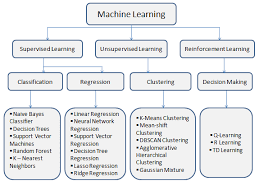
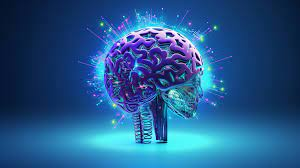
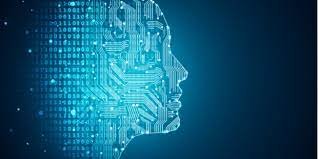
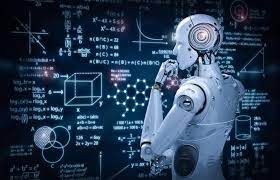
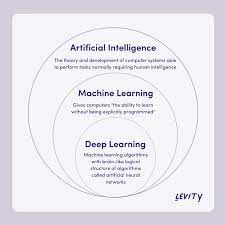
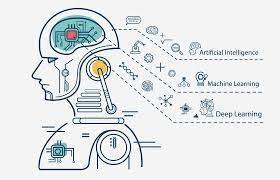
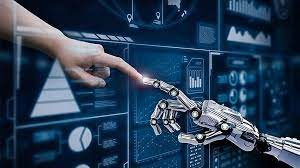
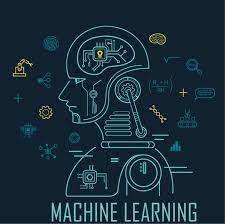
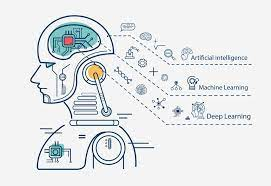
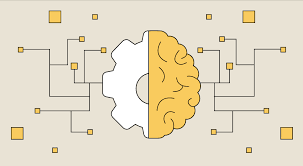
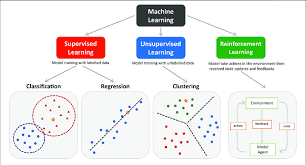
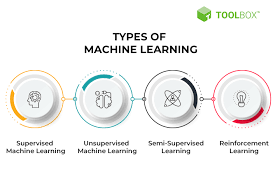
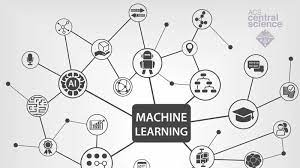
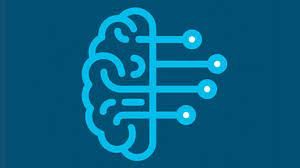
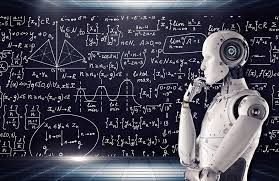
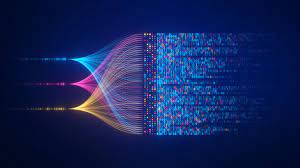
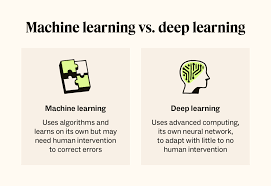

In [119]:
images=[]
image_tags=driver.find_elements(By.XPATH,'//img[@class="rg_i Q4LuWd"]')
for i in image_tags:
    images.append(i.get_attribute('src'))
print(images)
print("images of machine learning are:")
print(len(images))
time.sleep(4)
driver.quit()


['', '', '', '', '', '', '', '', '', '']

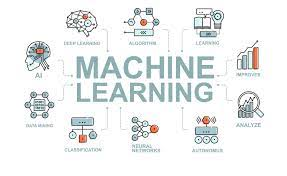
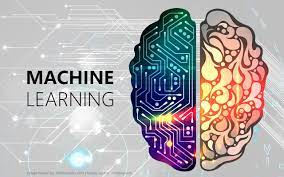
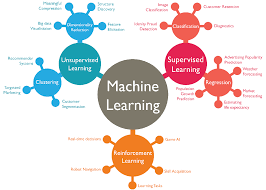
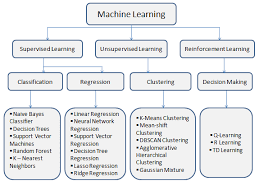
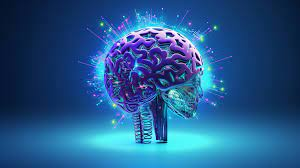
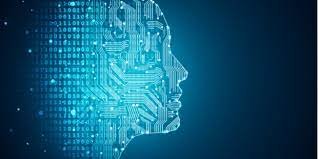
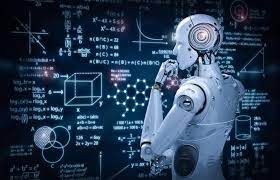
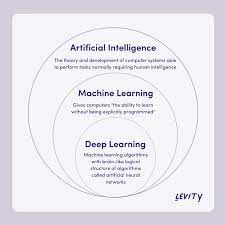
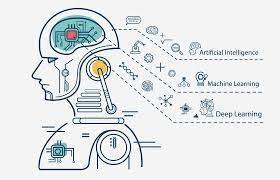
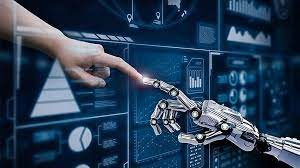

In [120]:
images=images[0:10]
print(images)

In [121]:
print(len(images))

10


In [89]:
#Scraping car images
driver=webdriver.Chrome()
driver.get('https://images.google.com/')
time.sleep(4)
search=driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/textarea')
search.send_keys("Cars")

In [90]:
search=driver.find_element(By.XPATH,'/html/body')
search.click()

['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]
images of car are:
48

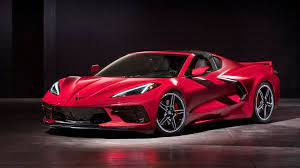
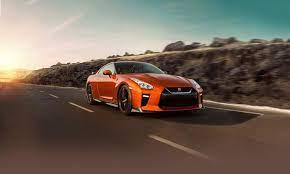
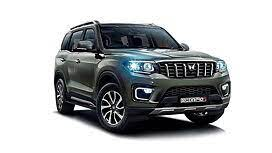
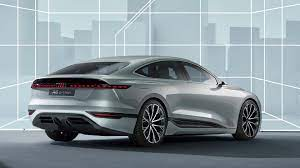
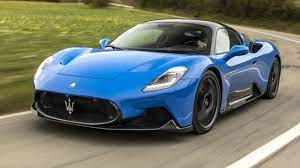
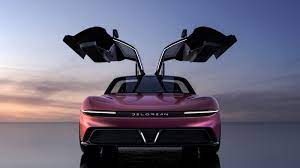
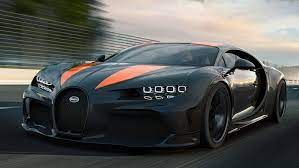
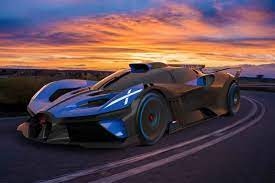
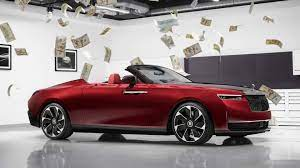
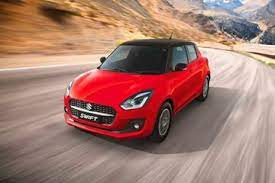
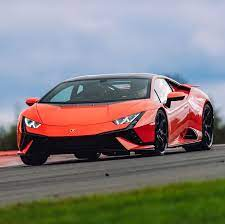
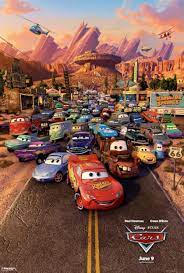
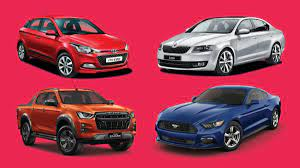
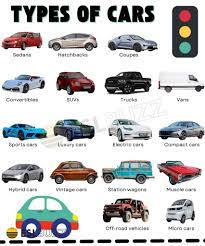
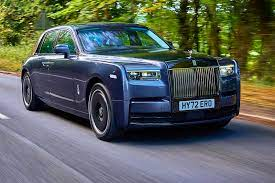
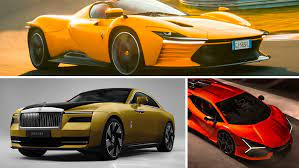
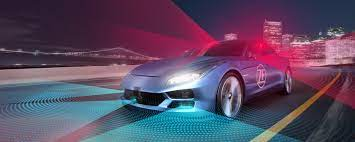
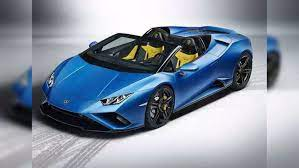
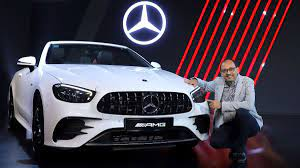
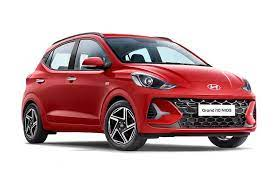

In [91]:
images=[]
image_tags=driver.find_elements(By.XPATH,'//img[@class="rg_i Q4LuWd"]')
for i in image_tags:
    images.append(i.get_attribute('src'))
    
print(images)
print("images of car are:")
print(len(images))
time.sleep(4)
driver.quit()

['', '', '', '', '', '', '', '', '', '']

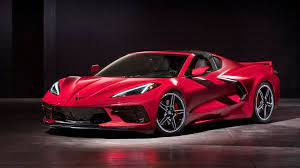
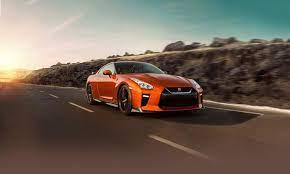
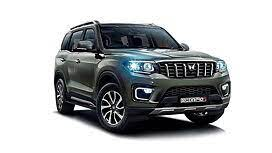
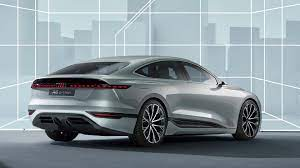
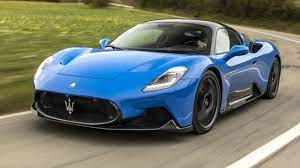
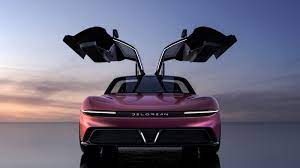
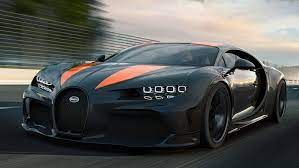
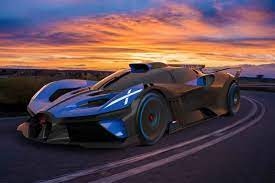
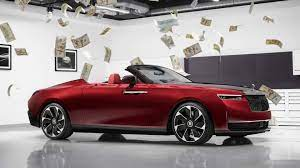
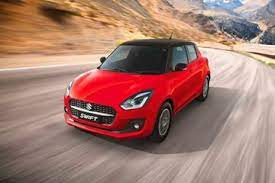

In [92]:
images=images[0:10]
print(images)

In [93]:
len(images)

10

In [97]:
#Scraping Cake images
driver=webdriver.Chrome()
driver.get('https://images.google.com/')
time.sleep(4)
search=driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/textarea')
search.send_keys("Cakes")

In [98]:
search=driver.find_element(By.XPATH,'/html/body')
search.click()

['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRNpWetqgqmi-W1AhM8hoNldF8YOAA1VoriwA&usqp=CAU', 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTz6q3UIvYYIb-EyqrO_VnoHUNWJdlwQ-PV6g&usqp=CAU', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]
Images of Cakes are:
48

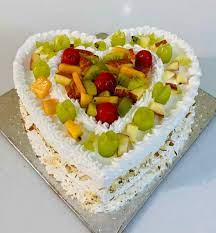
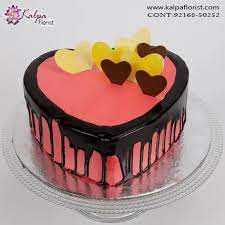
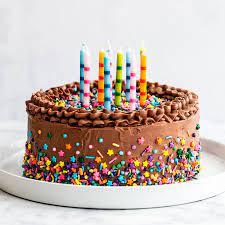
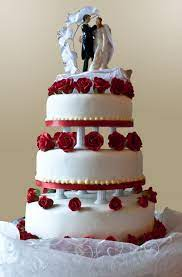
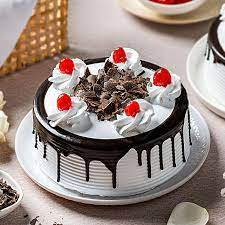
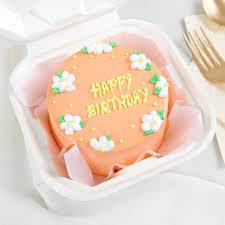
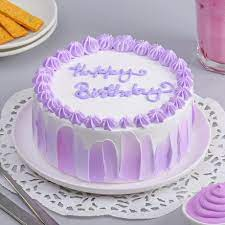
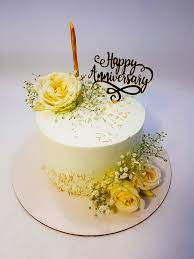
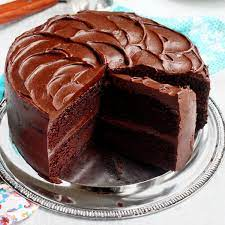
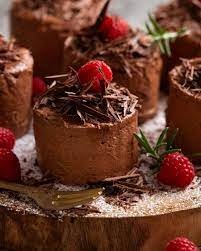
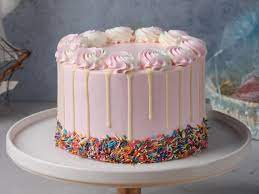
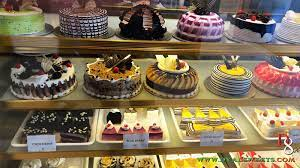
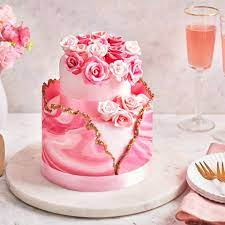
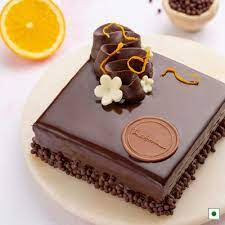
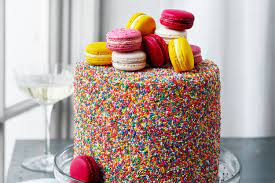
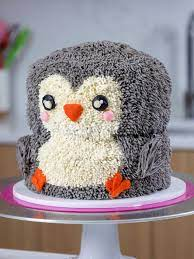
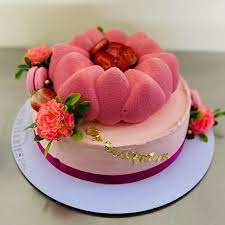
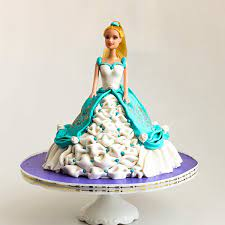
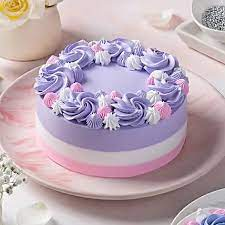
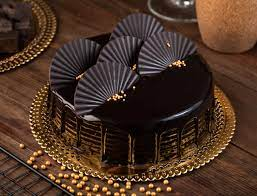

In [99]:
images=[]
image_tags=driver.find_elements(By.XPATH,'//img[@class="rg_i Q4LuWd"]')
for i in image_tags:
    images.append(i.get_attribute('src'))

print(images)
print("Images of Cakes are:")
print(len(images))
time.sleep(4)
driver.quit()

['', '', '', '', '', '', '', '', '', '']

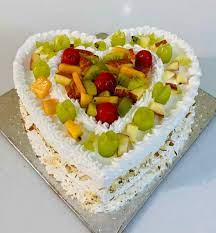
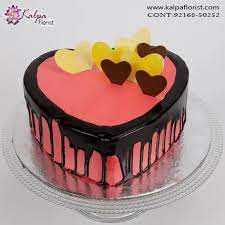
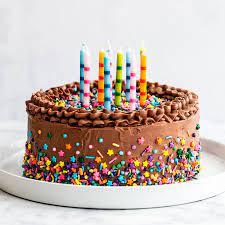
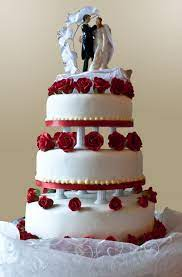
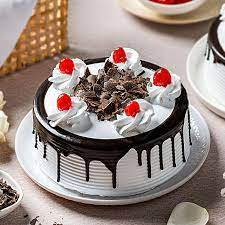
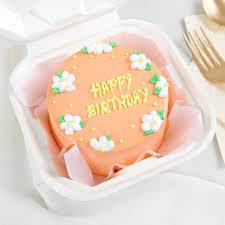
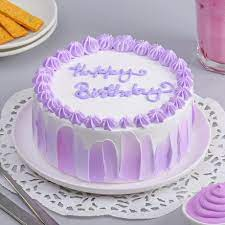
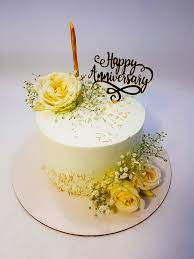
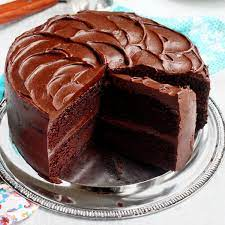
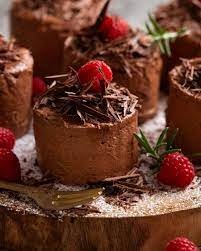

In [100]:
images=images[0:10]
print(images)

In [101]:
len(images)

10

In [102]:
#Scraping Guitar images
driver=webdriver.Chrome()
driver.get('https://images.google.com/')
time.sleep(4)
search=driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/textarea')
search.send_keys("Guitar")


In [103]:
search=driver.find_element(By.XPATH,'/html/body')
search.click()

['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]
images of guitars are:
48

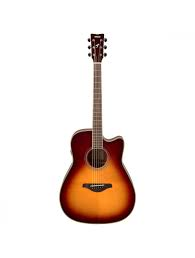
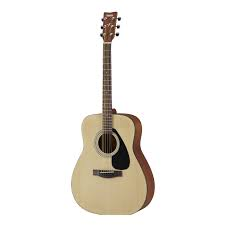
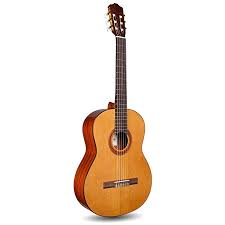
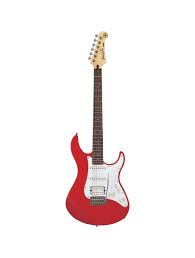
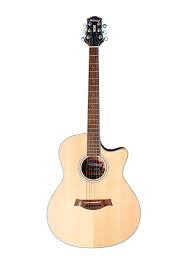
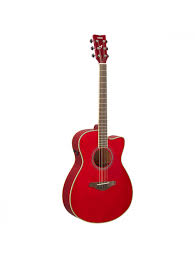
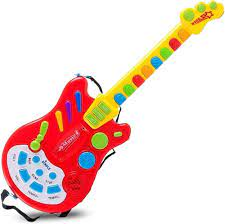
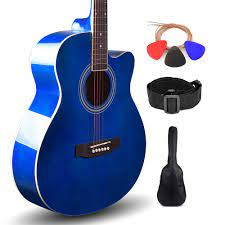
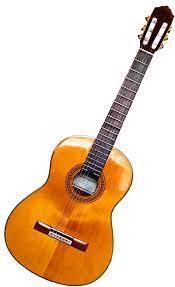
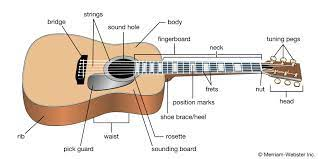
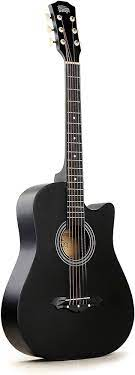
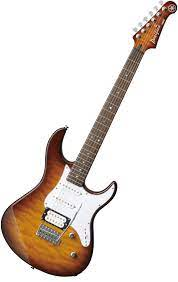
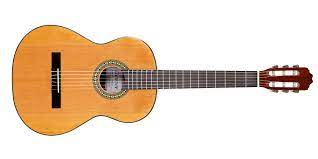
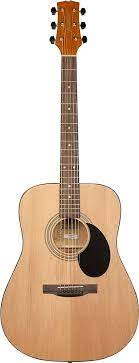
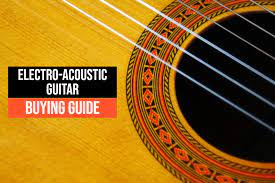
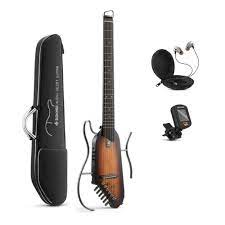
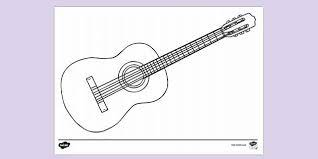
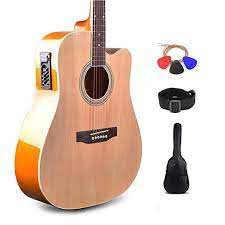
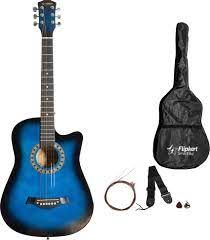
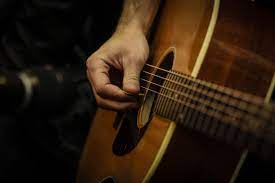

In [104]:
images=[]
image_tags=driver.find_elements(By.XPATH,'//img[@class="rg_i Q4LuWd"]')
for i in image_tags:
    images.append(i.get_attribute('src'))
print(images)
print("images of guitars are:")
print(len(images))
time.sleep(4)
driver.quit()

['', '', '', '', '', '', '', '', '', '']

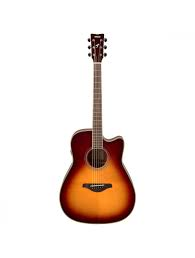
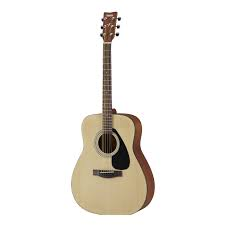
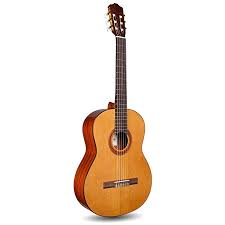
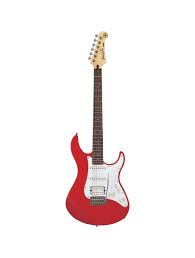
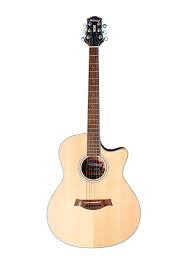
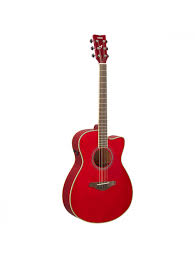
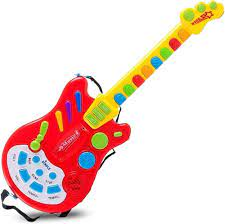
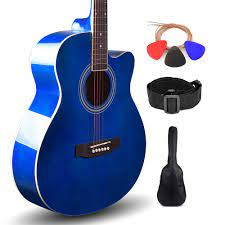
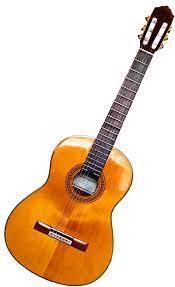
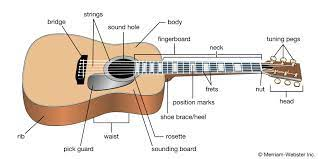

In [105]:
images=images[0:10]
print(images)

In [106]:
len(images)

10

# QUESTION NO 4

In [252]:
driver=webdriver.Chrome()

In [253]:
driver.get("https://www.flipkart.com/")

In [254]:
search=driver.find_element(By.XPATH,'/html/body/div[1]/div/div[1]/div/div/div/div/div[1]/div/div[1]/div/div[1]/div[1]/header/div[1]/div[2]/form/div/div/input')
search.send_keys('smartphone')


In [255]:
smartphone_search=driver.find_element(By.XPATH,'/html/body/div[1]/div/div[1]/div/div/div/div/div[1]/div/div[1]/div/div[1]/div[1]/header/div[1]/div[2]/form/div/button')
smartphone_search.click()


In [256]:
 # scrapping the details of brandname
brand_name=[]
brand_tags=driver.find_elements(By.XPATH,'//div[@class="_4rR01T"]')
for i in brand_tags:
    brand_i=i.text
    brand_name.append(brand_i)
    

In [257]:
print(brand_name)

['Motorola G34 5G (Ocean Green, 128 GB)', 'Motorola G34 5G (Ocean Green, 128 GB)', 'vivo T2x 5G (Marine Blue, 128 GB)', 'vivo T2x 5G (Aurora Gold, 128 GB)', 'vivo T2x 5G (Glimmer Black, 128 GB)', 'vivo T2x 5G (Marine Blue, 128 GB)', 'vivo T2x 5G (Glimmer Black, 128 GB)', 'vivo T2x 5G (Aurora Gold, 128 GB)', 'vivo T2x 5G (Aurora Gold, 128 GB)', 'vivo T2x 5G (Marine Blue, 128 GB)', 'vivo T2x 5G (Glimmer Black, 128 GB)', 'POCO C51 (Royal Blue, 64 GB)', 'Apple iPhone 15 (Black, 128 GB)', 'Motorola g54 5G (Pearl Blue, 128 GB)', 'Motorola g54 5G (Midnight Blue, 128 GB)', 'Motorola G34 5G (Ice Blue, 128 GB)', 'Motorola g54 5G (Mint Green, 256 GB)', 'Apple iPhone 15 (Blue, 128 GB)', 'Motorola Edge 40 Neo (Soothing Sea, 128 GB)', 'Motorola g54 5G (Mint Green, 128 GB)', 'POCO M6 5G (Orion Blue, 128 GB)', 'POCO M6 5G (Orion Blue, 128 GB)', 'realme 11x 5G (Midnight Black, 128 GB)', 'realme 11x 5G (Purple Dawn, 128 GB)']


In [258]:
onlybrand_name=[]
for item in brand_name:
    i=item.split(' ')[0].strip()
    onlybrand_name.append(i)
    
print(onlybrand_name)    

['Motorola', 'Motorola', 'vivo', 'vivo', 'vivo', 'vivo', 'vivo', 'vivo', 'vivo', 'vivo', 'vivo', 'POCO', 'Apple', 'Motorola', 'Motorola', 'Motorola', 'Motorola', 'Apple', 'Motorola', 'Motorola', 'POCO', 'POCO', 'realme', 'realme']


In [259]:
smartphone_name=[]
for item in brand_name:
    i=item.split(')')
    smartphone_name.append(i)
    
print(smartphone_name)    

[['Motorola G34 5G (Ocean Green, 128 GB', ''], ['Motorola G34 5G (Ocean Green, 128 GB', ''], ['vivo T2x 5G (Marine Blue, 128 GB', ''], ['vivo T2x 5G (Aurora Gold, 128 GB', ''], ['vivo T2x 5G (Glimmer Black, 128 GB', ''], ['vivo T2x 5G (Marine Blue, 128 GB', ''], ['vivo T2x 5G (Glimmer Black, 128 GB', ''], ['vivo T2x 5G (Aurora Gold, 128 GB', ''], ['vivo T2x 5G (Aurora Gold, 128 GB', ''], ['vivo T2x 5G (Marine Blue, 128 GB', ''], ['vivo T2x 5G (Glimmer Black, 128 GB', ''], ['POCO C51 (Royal Blue, 64 GB', ''], ['Apple iPhone 15 (Black, 128 GB', ''], ['Motorola g54 5G (Pearl Blue, 128 GB', ''], ['Motorola g54 5G (Midnight Blue, 128 GB', ''], ['Motorola G34 5G (Ice Blue, 128 GB', ''], ['Motorola g54 5G (Mint Green, 256 GB', ''], ['Apple iPhone 15 (Blue, 128 GB', ''], ['Motorola Edge 40 Neo (Soothing Sea, 128 GB', ''], ['Motorola g54 5G (Mint Green, 128 GB', ''], ['POCO M6 5G (Orion Blue, 128 GB', ''], ['POCO M6 5G (Orion Blue, 128 GB', ''], ['realme 11x 5G (Midnight Black, 128 GB', ''], ['

In [214]:
len(brand_name)

24

In [260]:
# scrapping the RAM,storageROM,PRIMARY CAMERA,SECONDARY CAMERA,DISPLAY SIZE AND BATTERY CAPACITY FROM THE GIVEN PAGE
ram=[]
ram_tags=driver.find_elements(By.XPATH,'//li[@class="rgWa7D"]')
for i in ram_tags:
    ram_i=i.text
    ram.append(ram_i)


In [261]:
print(ram)

['8 GB RAM | 128 GB ROM', '16.51 cm (6.5 inch) HD+ Display', '50MP + 2MP | 16MP Front Camera', '5000 mAh Battery', 'Snapdragon 695 5G Processor', 'Vegan Leather Design', '1 Year on Handset and 6 Months on Accessories', '4 GB RAM | 128 GB ROM', '16.51 cm (6.5 inch) HD+ Display', '50MP + 2MP | 16MP Front Camera', '5000 mAh Battery', 'Snapdragon 695 5G Processor', 'Vegan Leather Design', '1 Year on Handset and 6 Months on Accessories', '6 GB RAM | 128 GB ROM', '16.71 cm (6.58 inch) Full HD+ Display', '50MP + 2MP | 8MP Front Camera', '5000 mAh Battery', 'Mediatek Dimensity 6020 Processor', '1 Year of Device & 6 Months for Inbox Accessories', '6 GB RAM | 128 GB ROM', '16.71 cm (6.58 inch) Full HD+ Display', '50MP + 2MP | 8MP Front Camera', '5000 mAh Battery', 'Mediatek Dimensity 6020 Processor', '1 Year of Device & 6 Months for Inbox Accessories', '6 GB RAM | 128 GB ROM', '16.71 cm (6.58 inch) Full HD+ Display', '50MP + 2MP | 8MP Front Camera', '5000 mAh Battery', 'Mediatek Dimensity 6020 P

In [262]:
ram_rom_list = []
display_list = []
camera_list = []
battery_list = []
processor_list = []
warranty_list = []

ul_elements = driver.find_elements(By.XPATH, '//div[@class="fMghEO"]')  
for ul in ul_elements:
    li_elements = ul.find_elements(By.XPATH, '//ul[@class="_1xgFaf"]')
    for li in li_elements:
        elements = li.find_elements(By.XPATH, '//li[@class="rgWa7D"]') 
        ram_rom_list.append(elements[0].text)
        display_list.append(elements[1].text)
        camera_list.append(elements[2].text)
        battery_list.append(elements[3].text)
        processor_list.append(elements[4].text)
        warranty_list.append(elements[5].text)

# Print or use the separated lists
print("RAM and ROM List:", ram_rom_list)
print("Display List:", display_list)
print("Camera List:", camera_list)
print("Battery List:", battery_list)
print("Processor List:", processor_list)
print("Warranty List:", warranty_list)


RAM and ROM List: ['8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB 

In [263]:
ram_rom_list = []
display_list = []
camera_list = []
battery_list = []
processor_list = []
warranty_list = []

ul_elements = driver.find_elements(By.XPATH, '//div[@class="fMghEO"]')  
for ul in ul_elements:
    li_elements = ul.find_elements(By.XPATH, '//ul[@class="_1xgFaf"]')
    for li in li_elements:
        elements = li.find_elements(By.XPATH, '//li[@class="rgWa7D"]') 
        ram_rom_list.append(elements[0].text)
        display_list.append(elements[1].text)
        camera_list.append(elements[2].text)
        battery_list.append(elements[3].text)
        processor_list.append(elements[4].text)
        warranty_list.append(elements[5].text)

# Print or use the separated lists
print("RAM and ROM List:", ram_rom_list)
print("Display List:", display_list)
print("Camera List:", camera_list)
print("Battery List:", battery_list)
print("Processor List:", processor_list)
print("Warranty List:", warranty_list)


RAM and ROM List: ['8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB RAM | 128 GB ROM', '8 GB 

In [264]:
ram_rom=[]
display=[]
front_camera=[]
battery=[]
processor=[]
warranty=[]
for item in ram:
    ram_rom1 = ram[0].split('|')
    display1 = ram[1].split('(')  # Splitting at '(' to separate size from the rest
    front_camera1 = ram[2].split('|')
    #battery1 = ram[3]  # Keeping the battery as it is
    #processor1 = ram[4]  # Keeping the processor as it is
    #warranty1 = ram[5]  # Keeping the warranty information as it is
    ram_rom.append(ram_rom1)
    display.append(display1)
    front_camera.append(front_camera1)
    #battery=battery.append(battery1)
    #processor=processor.append(processor1)
    #warranty.append(warranty1)
print(ram_rom)
print(len(ram_rom))
#print(battery)
#print(processor)
#print(warranty)

[['8 GB RAM ', ' 128 GB ROM'], ['8 GB RAM ', ' 128 GB ROM'], ['8 GB RAM ', ' 128 GB ROM'], ['8 GB RAM ', ' 128 GB ROM'], ['8 GB RAM ', ' 128 GB ROM'], ['8 GB RAM ', ' 128 GB ROM'], ['8 GB RAM ', ' 128 GB ROM'], ['8 GB RAM ', ' 128 GB ROM'], ['8 GB RAM ', ' 128 GB ROM'], ['8 GB RAM ', ' 128 GB ROM'], ['8 GB RAM ', ' 128 GB ROM'], ['8 GB RAM ', ' 128 GB ROM'], ['8 GB RAM ', ' 128 GB ROM'], ['8 GB RAM ', ' 128 GB ROM'], ['8 GB RAM ', ' 128 GB ROM'], ['8 GB RAM ', ' 128 GB ROM'], ['8 GB RAM ', ' 128 GB ROM'], ['8 GB RAM ', ' 128 GB ROM'], ['8 GB RAM ', ' 128 GB ROM'], ['8 GB RAM ', ' 128 GB ROM'], ['8 GB RAM ', ' 128 GB ROM'], ['8 GB RAM ', ' 128 GB ROM'], ['8 GB RAM ', ' 128 GB ROM'], ['8 GB RAM ', ' 128 GB ROM'], ['8 GB RAM ', ' 128 GB ROM'], ['8 GB RAM ', ' 128 GB ROM'], ['8 GB RAM ', ' 128 GB ROM'], ['8 GB RAM ', ' 128 GB ROM'], ['8 GB RAM ', ' 128 GB ROM'], ['8 GB RAM ', ' 128 GB ROM'], ['8 GB RAM ', ' 128 GB ROM'], ['8 GB RAM ', ' 128 GB ROM'], ['8 GB RAM ', ' 128 GB ROM'], ['8 GB RA

In [265]:
print(display)
print(len(display))

[['16.51 cm ', '6.5 inch) HD+ Display'], ['16.51 cm ', '6.5 inch) HD+ Display'], ['16.51 cm ', '6.5 inch) HD+ Display'], ['16.51 cm ', '6.5 inch) HD+ Display'], ['16.51 cm ', '6.5 inch) HD+ Display'], ['16.51 cm ', '6.5 inch) HD+ Display'], ['16.51 cm ', '6.5 inch) HD+ Display'], ['16.51 cm ', '6.5 inch) HD+ Display'], ['16.51 cm ', '6.5 inch) HD+ Display'], ['16.51 cm ', '6.5 inch) HD+ Display'], ['16.51 cm ', '6.5 inch) HD+ Display'], ['16.51 cm ', '6.5 inch) HD+ Display'], ['16.51 cm ', '6.5 inch) HD+ Display'], ['16.51 cm ', '6.5 inch) HD+ Display'], ['16.51 cm ', '6.5 inch) HD+ Display'], ['16.51 cm ', '6.5 inch) HD+ Display'], ['16.51 cm ', '6.5 inch) HD+ Display'], ['16.51 cm ', '6.5 inch) HD+ Display'], ['16.51 cm ', '6.5 inch) HD+ Display'], ['16.51 cm ', '6.5 inch) HD+ Display'], ['16.51 cm ', '6.5 inch) HD+ Display'], ['16.51 cm ', '6.5 inch) HD+ Display'], ['16.51 cm ', '6.5 inch) HD+ Display'], ['16.51 cm ', '6.5 inch) HD+ Display'], ['16.51 cm ', '6.5 inch) HD+ Display'],

In [222]:
# scrapping the price from the given page
price=[]
price_tags=driver.find_elements(By.XPATH,'//div[@class="_30jeq3 _1_WHN1"]')
for i in price_tags:
    price_i=i.text
    price.append(price_i)

In [223]:
print(price)

['₹11,999', '₹5,499', '₹14,999', '₹11,999', '₹12,999', '₹12,999', '₹12,999', '₹10,999', '₹11,999', '₹14,999', '₹11,999', '₹14,999', '₹11,999', '₹4,999', '₹13,999', '₹10,999', '₹13,999', '₹15,999', '₹9,999', '₹26,999', '₹25,999', '₹26,999', '₹25,999', '₹22,999']


In [224]:
len(price)

24

In [226]:
#scrapping product url
url=[]
url_tags=driver.find_elements(By.XPATH,'//div[@class="CXW8mj"]/img')
for i in url_tags:
    url.append(i.get_attribute('src'))
    
print(url)    
    

['https://rukminim2.flixcart.com/image/312/312/xif0q/mobile/z/f/g/-original-imagxhd5gqhzszeb.jpeg?q=70', 'https://rukminim2.flixcart.com/image/312/312/xif0q/mobile/m/p/y/12-pro-5g-rmx3842-realme-original-imagxgnhafyjz8rb.jpeg?q=70', 'https://rukminim2.flixcart.com/image/312/312/xif0q/mobile/6/v/0/c51-mzb0dxkin-poco-original-imagzdpycgrcdc8z.jpeg?q=70', 'https://rukminim2.flixcart.com/image/312/312/xif0q/mobile/k/u/n/-original-imagzjhwtfthcmzz.jpeg?q=70', 'https://rukminim2.flixcart.com/image/312/312/xif0q/mobile/k/u/n/-original-imagzjhwtfthcmzz.jpeg?q=70', 'https://rukminim2.flixcart.com/image/312/312/xif0q/mobile/c/s/x/-original-imagzjhwaaewgj8r.jpeg?q=70', 'https://rukminim2.flixcart.com/image/312/312/xif0q/mobile/4/h/e/-original-imagzjhwmsamexfk.jpeg?q=70', 'https://rukminim2.flixcart.com/image/312/312/xif0q/mobile/k/u/n/-original-imagzjhwtfthcmzz.jpeg?q=70', 'https://rukminim2.flixcart.com/image/312/312/xif0q/mobile/4/h/e/-original-imagzjhwmsamexfk.jpeg?q=70', 'https://rukminim2.fl

In [228]:
url=url[0:24]
print(url)

['https://rukminim2.flixcart.com/image/312/312/xif0q/mobile/z/f/g/-original-imagxhd5gqhzszeb.jpeg?q=70', 'https://rukminim2.flixcart.com/image/312/312/xif0q/mobile/m/p/y/12-pro-5g-rmx3842-realme-original-imagxgnhafyjz8rb.jpeg?q=70', 'https://rukminim2.flixcart.com/image/312/312/xif0q/mobile/6/v/0/c51-mzb0dxkin-poco-original-imagzdpycgrcdc8z.jpeg?q=70', 'https://rukminim2.flixcart.com/image/312/312/xif0q/mobile/k/u/n/-original-imagzjhwtfthcmzz.jpeg?q=70', 'https://rukminim2.flixcart.com/image/312/312/xif0q/mobile/k/u/n/-original-imagzjhwtfthcmzz.jpeg?q=70', 'https://rukminim2.flixcart.com/image/312/312/xif0q/mobile/c/s/x/-original-imagzjhwaaewgj8r.jpeg?q=70', 'https://rukminim2.flixcart.com/image/312/312/xif0q/mobile/4/h/e/-original-imagzjhwmsamexfk.jpeg?q=70', 'https://rukminim2.flixcart.com/image/312/312/xif0q/mobile/k/u/n/-original-imagzjhwtfthcmzz.jpeg?q=70', 'https://rukminim2.flixcart.com/image/312/312/xif0q/mobile/4/h/e/-original-imagzjhwmsamexfk.jpeg?q=70', 'https://rukminim2.fl

In [229]:
len(url)

24

# QUESTION NO 5
PROGRAM TO SCRAP GEOSPATIAL COORDINATES OF A CITY

In [267]:
driver=webdriver.Chrome()

In [268]:
driver.get('https:www.google.com/maps')

In [269]:
search_box=driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/div[8]/div[3]/div[1]/div[1]/div/div[2]/form/input')
search_box.send_keys("New Delhi")

In [270]:
search=driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/div[8]/div[3]/div[1]/div[1]/div/div[2]/div[1]/button/span')
search.click()

In [271]:
url=driver.current_url
print(url)

https://www.google.com/maps/place/New+Delhi,+Delhi/@28.5273522,77.2089851,10z/data=!3m1!4b1!4m6!3m5!1s0x390cfd5b347eb62d:0x52c2b7494e204dce!8m2!3d28.6139391!4d77.2090212!16zL20vMGRsdjA?entry=ttu


In [272]:
latitude_longitude=url.split("@")[1].split(",")[0:2]
latitude=latitude_longitude[0]
longitude=latitude_longitude[1]

In [273]:
print( "the coordinates of New Delhi latitude:",latitude,"longitude:",longitude )

the coordinates of New Delhi latitude: 28.5273522 longitude: 77.2089851


# QUESTION NO 6
PROGRAM TO SCRAP DETAILS OF BEST GAMING LAPTOP 

In [140]:
driver=webdriver.Chrome()

In [141]:
driver.get('https://www.digit.in/top-products/best-gaming-laptops-40.html')

In [142]:
#scrapping the details of the name of the laptops
name=[]
name_tags=driver.find_elements(By.XPATH,'//h3[@class="font130 mt0 mb10 mobilesblockdisplay "]')
for i in name_tags:
    name_i=i.text
    name.append(name_i)

In [143]:
print(name)

['HP Omen 17-ck2008TX 13th Gen Core i7-13700HX', 'MSI GT77 Titan 12UHS-054IN 12th Gen Core i9-12900HX', 'Lenovo Legion 5i Pro 12th Gen Core i7-12700H (82RF00E1IN)', 'ASUS ROG Strix Scar 18 G834JZ-N5041WS 13th Gen Core i9-13980HX', 'Acer Predator Helios Neo 16 13th Gen Core i7-13700HX (PHN16-71)', 'ASUS ROG Zephyrus G14 Ryzen 9-6900HS (GA402RJZ-L4136WS)', 'MSI Cyborg 15 12th Gen Core i7-12650H (A12VF-205IN)']


In [145]:
#scrapping the details of the operating system,display size,resolution and processor of laptops from the given page
operating_system=[]
operating_tags=driver.find_elements(By.XPATH,'//span[@class="meta_v_value"]')
for i in operating_tags:
    operating_i=i.text
    operating_system.append(operating_i)

In [146]:
print(operating_system)

['Windows 11 Home', '17.3', '2560 x 1440', '13th Gen Intel Core i7-13700HX', 'Windows 11 Home', '16', '2560 x 1600', '12th Gen Intel Core i7-12700H', 'Windows 11 Home', '16', '2560 x 1600', '13th Gen Intel Core i7-13700HX']


In [150]:
driver.quit()

# question no 7

# SCRAPPING DETAILS OF BILLIONAIRES FROM FORBES

In [127]:
driver=webdriver.Chrome()

In [128]:
driver.get('https://www.forbes.com/billionaires/')

In [129]:
# scrapping details of all billionaires their rank,name,age,sorces and industry
data=[]
data_tags=driver.find_elements(By.XPATH,'//div[@class="TableRow_cell__db-hv Table_cell__houv9"]/div')
for i in data_tags:
    data_i=i.text
    data.append(data_i)
print(data)    

['1', 'Bernard Arnault & family', '$211 B', '74', 'LVMH', 'Fashion & Retail', '2', 'Elon Musk', '$180 B', '51', 'Tesla, SpaceX', 'Automotive', '3', 'Jeff Bezos', '$114 B', '59', 'Amazon', 'Technology', '4', 'Larry Ellison', '$107 B', '78', 'Oracle', 'Technology', '5', 'Warren Buffett', '$106 B', '92', 'Berkshire Hathaway', 'Finance & Investments', '6', 'Bill Gates', '$104 B', '67', 'Microsoft', 'Technology', '7', 'Michael Bloomberg', '$94.5 B', '81', 'Bloomberg LP', 'Media & Entertainment', '8', 'Carlos Slim Helu & family', '$93 B', '83', 'Telecom', 'Telecom', '9', 'Mukesh Ambani', '$83.4 B', '65', 'Diversified', 'Diversified', '10', 'Steve Ballmer', '$80.7 B', '67', 'Microsoft', 'Technology', '11', 'Francoise Bettencourt Meyers & family', '$80.5 B', '69', "L'Oréal", 'Fashion & Retail', '12', 'Larry Page', '$79.2 B', '50', 'Google', 'Technology', '13', 'Amancio Ortega', '$77.3 B', '87', 'Zara', 'Fashion & Retail', '14', 'Sergey Brin', '$76 B', '49', 'Google', 'Technology', '15', 'Zhong

In [139]:
driver.quit()

# QUESTION NO 8
PROGRAM TO EXTRACT COMMENTS,COMMENT UPVOTE AND TIME FROM YOUTUBE VIDEO

In [308]:
driver=webdriver.Chrome()

In [310]:
driver.get('https://www.youtube.com/watch?v=_g5roKHj95o')

In [312]:
# scrapping time from the given page
time=[]
time_tags=driver.find_elements(By.XPATH,'//a[@class="yt-simple-endpoint style-scope yt-formatted-string"]')
for i in time_tags[3:]:
    time_i=i.text
    time.append(time_i)

In [313]:
print(time)

['11 months ago', 'https://imp.i384100.net/c/4021125/1347618/14726?u=https%3A%2F%2Fwww.coursera.org%2Fprofessional-certificates%2Fgoogle-data-analytics', '9 months ago', '9 months ago', '9 months ago', '7 months ago', '7 months ago', '8 months ago', '9 months ago', '7 months ago', '10 months ago', '10 months ago', '4 months ago', '11 months ago', '1 month ago', '5 months ago', '10 months ago', '10 months ago', '1 month ago', '10 months ago', '9 months ago']


In [314]:
comment=[]
comment_tags=driver.find_elements(By.XPATH,'//div[@class="style-scope ytd-expander"]/yt-formatted-string')
for i in comment_tags:
    comment_i=i.text
    comment.append(comment_i)

In [315]:
print(comment)

['Sign up to enroll for a 7-day free trial with Coursera now! https://imp.i384100.net/c/4021125/1347618/14726?u=https%3A%2F%2Fwww.coursera.org%2Fprofessional-certificates%2Fgoogle-data-analytics', "I am enrolled to the Google Data Analytics Professional Certificate program, which is made up of 8 courses.I am currently in week 2 of the 4th part of the program.. Your 10 minutes video has benefited me significantly more than the 2-3 months I spent on Google's program... So seeing you promote for infuriates me (not you, but the Google program itself).", 'This is such a brilliant video. 10 minutes is just right to get people excited. We newbies can actually follow it with playbacks.', "Im a few days into the Google Cert course (about 5 hours) and so far I'm liking it. Not much hands on, mainly concepts. You're video was straight to the point, no flush and jam packed with great info. This got me excited and fired up to continue! Thank you so much! I'm now a subscriber!", "Man! I'm absolutely

In [318]:
upvote=[]
upvote_tags=driver.find_elements(By.XPATH,'//span[@class="style-scope ytd-comment-action-buttons-renderer"]')
for i in upvote_tags:
    upvote_i=i.text
    upvote.append(upvote_i)

In [319]:
print(upvote)

['', '39', '', '', '73', '', '', '33', '', '', '53', '', '', '53', '', '', '27', '', '', '13', '', '', '14', '', '', '1', '', '', '26', '', '', '9', '', '', '1', '', '', '27', '', '', '', '', '', '1', '', '', '6', '', '', '5', '', '', '', '', '', '5', '', '', '1', '']


# QUESTION NO 9
PYTHON PROGRAM TO SCRAP DATA FROM ALL AVAILABLE HOSTELS FROM LONDON

In [230]:
driver=webdriver.Chrome()

In [231]:
driver.get('https://www.hostelworld.com/')

In [234]:
location=driver.find_element(By.XPATH,'/html/body/div[3]/div/div/div[2]/div[2]/div[2]/div/div/div/div[1]/div/div/div[2]/input')
location.send_keys('london')


In [236]:
search=driver.find_element(By.XPATH,'/html/body/div[3]/div/div/div[2]/div[2]/div[2]/div/div/div/div[5]/button[1]')
search.click()

In [237]:
#scrapping the details of hostel name from the given page
hostel_name=[]
start=0
end=2
for page in range(start,end):
    name_tags=driver.find_elements(By.XPATH,'//div[@class="property-name"]/span')
    for i in name_tags:
        name_i=i.text
        hostel_name.append(name_i)

    next=driver.find_elements(By.XPATH,'/html/body/div[3]/div/div/div[2]/div[2]/div[1]/div/div/div[4]/div/div[2]/button')
    
    time.sleep(2)
    
    
    


In [238]:
print(hostel_name)

["Wombat's City Hostel London", 'Palmers Lodge - Swiss Cottage', "St Christopher's Village", 'NX London Hostel', 'Urbany Hostel London', 'Onefam Notting Hill', 'Generator London', 'Onefam Waterloo', 'Astor Hyde Park', 'Safestay London Elephant & Castle', 'Astor Museum Inn', 'No.8 Seven Sisters', 'No.8 Willesden Hostel London', 'Clink261', 'Smart Russell Square Hostel', 'Safestay London Kensington Holland Park', 'Smart Hyde Park Inn Hostel', 'Destinations Hostels @ The Gallery', 'Hostelle - women only hostel London', 'Queen Elizabeth Chelsea', 'Prime Backpackers Angel', 'Kabannas London St Pancras', 'London Backpackers', 'Astor Kensington', "St Christopher's Hammersmith", 'Astor Victoria', 'Phoenix Hostel', 'Barmy Badger Backpackers', 'Park Villa', 'PubLove @ The Rose & Crown', "Wombat's City Hostel London", 'Palmers Lodge - Swiss Cottage', "St Christopher's Village", 'NX London Hostel', 'Urbany Hostel London', 'Onefam Notting Hill', 'Generator London', 'Onefam Waterloo', 'Astor Hyde Pa

In [239]:
len(hostel_name)

60

In [248]:
#scrapping distance from city centre
distance=[]
start=0
end=2
for page in range(start,end):
     
    
    distance_tags=driver.find_elements(By.XPATH,'//span[@class="distance-description"]')
    for i in distance_tags:
        distance_i=distance
        distance.append(distance_i)
    next=driver.find_elements(By.XPATH,'/html/body/div[3]/div/div/div[2]/div[2]/div[1]/div/div/div[4]/div/div[2]/button')
    
    time.sleep(2)
        



In [249]:
print(distance)

[[...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...]]


In [182]:
len(distance)

60

In [184]:
# scrapping reviews from the given page
reviews=[]
start=0
end=2
for page in range(start,end):
    reviews_tags=driver.find_elements(By.XPATH,'//div[@class="review"]')
    for i in reviews_tags:
        reviews_i=i.text
        reviews.append(reviews_i)
    next=driver.find_elements(By.XPATH,'/html/body/div[3]/div/div/div[2]/div[2]/div[1]/div/div/div[5]/div/div[2]/button/span')
    time.sleep(2)
    


In [185]:
print(reviews)

['(15901)', '(15972)', '(12873)', '(2146)', '(1125)', '(2593)', '(8082)', '(135)', '(12327)', '(5278)', '(9455)', '(4178)', '(5201)', '(515)', '(10207)', '(1783)', '(6800)', '(317)', '(116)', '(3687)', '(871)', '(2977)', '(4568)', '(3143)', '(6595)', '(4389)', '(15098)', '(4624)', '(2041)', '(931)', '(15901)', '(15972)', '(12873)', '(2146)', '(1125)', '(2593)', '(8082)', '(135)', '(12327)', '(5278)', '(9455)', '(4178)', '(5201)', '(515)', '(10207)', '(1783)', '(6800)', '(317)', '(116)', '(3687)', '(871)', '(2977)', '(4568)', '(3143)', '(6595)', '(4389)', '(15098)', '(4624)', '(2041)', '(931)']


In [186]:
len(reviews)

60

In [187]:
#scrapping privates from price and doms from price
privates=[]
start=0
end=2
for page in range(start,end):
    privates_tags=driver.find_elements(By.XPATH,'//strong[@class="current"]')
    for i in privates_tags:
        privates_i=i.text
        privates.append(privates_i)
    next=driver.find_elements(By.XPATH,'/html/body/div[3]/div/div/div[2]/div[2]/div[1]/div/div/div[5]/div/div[2]/button/span')
    time.sleep(2)

In [188]:
print(privates)

['₹12,334', '₹2,393', '₹3,827', '₹11,590', '₹2,090', '₹2,953', '₹8,338', '₹2,490', '₹14,271', '₹3,027', '₹3,208', '₹2,126', '₹19,674', '₹2,158', '₹9,601', '₹2,884', '₹1,042', '₹920', '₹9,427', '₹2,947', '₹1,860', '₹1,773', '₹10,196', '₹1,546', '₹3,626', '₹2,758', '₹1,681', '₹3,177', '₹3,044', '₹1,466', '₹2,300', '₹9,678', '₹1,857', '₹1,734', '₹8,833', '₹1,613', '₹1,410', '₹6,843', '₹4,044', '₹12,334', '₹2,393', '₹3,827', '₹11,590', '₹2,090', '₹2,953', '₹8,338', '₹2,490', '₹14,271', '₹3,027', '₹3,208', '₹2,126', '₹19,674', '₹2,158', '₹9,601', '₹2,884', '₹1,042', '₹920', '₹9,427', '₹2,947', '₹1,860', '₹1,773', '₹10,196', '₹1,546', '₹3,626', '₹2,758', '₹1,681', '₹3,177', '₹3,044', '₹1,466', '₹2,300', '₹9,678', '₹1,857', '₹1,734', '₹8,833', '₹1,613', '₹1,410', '₹6,843', '₹4,044']


In [200]:
#scrapping property description
property_description=[]
start=0
end=2
for page in range(start,end):
    description_tags=driver.find_elements(By.XPATH,'//div[@class="collapsible"]')
    for i in description_tags:
        description_i=i.text
        property_description.append(description_i)
    next=driver.find_elements(By.XPATH,'/html/body/div[3]/div/div/div[2]/div[2]/div[1]/div/div/div[5]/div/div[2]/button')
    time.sleep(2)   
    


In [201]:
print(property_description)

["Property Description\nA safe haven in the middle of the metropolis: We took a traditional brick building with roots dating back to the 1800s and set a new standard for hostel life in the UK.\nWhat was once sailors' accommodation is now a hostel that caters for all the needs of the modern traveller. With great attention to detail, we have created a hostel in London that celebrates the heritage of our historic building.\nThe old oak that once formed part of sturdy ships and churches is now immortalised in our furnishings throughout the house. The beers you drink here will be served on a bar made from 500 year old wood!\n\nOur Wombat's City Hostel is located in the London Borough of Tower Hamlets, right next to the famous Tower Bridge and Tower of London, charming markets, authentic pubs and many other places of historical interest.\nA short walk will take you to trendy Shoreditch with its vibrant street art, the lively nightlife of Hoxton Square and Old Street and finally Brick Lane, w

In [144]:
#scarpping facilities from the given page
facilities=[]
facilities_tags=driver.find_elements(By.XPATH,'//div[@class="page-inner"]')
for i in facilities_tags:
    facilities_i=i.text
    facilities.append( facilities_i)

In [145]:
print(facilities)

['Sign In / Create Account\nEnglish\nINR\nMenu', '1/30', "LOCATION\nWOMBAT'S CITY HOSTEL LONDON, LONDON, ENGLAND\nCHECK IN\nCHECK OUT\nGUESTS\nSearch", "Wombat's City Hostel London\n7 Dock Street, London, England", 'Prices\nFacilities\nMap\nReviews\nHouse Rules', "9.1\nSuperb\n15878 Total Reviews\nPerfect Location\nSuperb Staff\nFantastic Cleanliness\nProperty Description\nA safe haven in the middle of the metropolis: We took a traditional brick building with roots dating back to the 1800s and set a new standard for hostel life in the UK.\nWhat was once sailors' accommodation is now a hostel that caters for all the needs of the modern traveller. With great attention to detail, we have created a hostel in London that celebrates the heritage of our historic building.\nThe old oak that once formed part of sturdy ships and churches is now immortalised in our furnishings throughout the house. The beers you drink here will be served on a bar made from 500 year old wood!\n\nOur Wombat's City 

In [146]:
len(facilities)

12